# Script to view the changes in species concentration and radiative forcing from rocket launches and object re-entries.

In [1]:
# Import modules
import sys, os
#sys.path.append('/home/ucfacb0/rundirs/Rockets/gc_4x5_47L_merra2_fullchem_main/OutputDir')
import numpy as np
import netCDF4
import xarray as xr
import matplotlib.pyplot as plt
import matplotlib as mpl
import matplotlib.colors as colors
import cartopy.crs as ccrs
from gamap_colormap import WhGrYlRd

# Set up arrays
months =['01','02','03','04','05','06','07','08','09','10','11']#,'12' ]
years = ["2020"]
filepath     = '/home/ucfacb0/rundirs/Rockets/gc_4x5_47L_merra2_fullchem_main/OutputDir/'
rocketsSim   ='Rockets' 
norocketsSim = 'Baseline'
Plower =200
Pupper = 1
species = ["BC","NOx","O3","Al2O3","Cly","CO"]
mon_mean_nr, mon_mean_wr = np.zeros((len(species),len(months))), np.zeros((len(species),len(months)))
count = 0
year_labels = [2020]

### Retrieve concentrations from SpeciesConc over the stratosphere.

In [2]:
for year_count,year in enumerate(years):
    for mth in months:
        met = xr.open_dataset(f'/home/ucfacb0/Scratch/StateMet/4x5/{year}/GEOSChem.StateMet.{year}{mth}01_0000z.nc4')
        wr  = xr.open_dataset(filepath+rocketsSim+f'/GEOSChem.SpeciesConc.{year}{mth}01_0000z.nc4') 
        nr  = xr.open_dataset(filepath+norocketsSim+f'/GEOSChem.SpeciesConc.{year}{mth}01_0000z.nc4' )
        
        # Set up the pressure ranges.
        time, lon, lat = nr.variables['time'][:], nr.variables['lon'][:], nr.variables['lat'][:]
        P0, hyai, hybi = nr.variables['P0'], nr.variables['hyai'][:], nr.variables['hybi'][:]
        Pedge = [ hyai[i] + (hybi[i]*1000) for i in np.arange(len(hyai)) ]
        iu = np.argmin(np.abs([ Pedge[i] - Pupper for i in np.arange(len(Pedge)) ] )) # grid index of upper pressure level
        il = np.argmin(np.abs([ Pedge[i] - Plower for i in np.arange(len(Pedge)) ] )) # grid index of lower pressure level   
        Pedge = Pedge[il:iu]
        
        # Black carbon
        mon_mean_nr[0,count] = (nr["SpeciesConcVV_BCPO"].isel(time=0,lev=(np.arange(il,iu))).mean().values + 
                                nr["SpeciesConcVV_BCPI"].isel(time=0,lev=(np.arange(il,iu))).mean().values) * 1e12
        mon_mean_wr[0,count] = (wr["SpeciesConcVV_BCPO"].isel(time=0,lev=(np.arange(il,iu))).mean().values + 
                                wr["SpeciesConcVV_BCPI"].isel(time=0,lev=(np.arange(il,iu))).mean().values) * 1e12  
        
        # NOx
        mon_mean_nr[1,count] = (nr["SpeciesConcVV_NO"].isel(time=0,lev=(np.arange(il,iu))).mean().values + 
                                nr["SpeciesConcVV_NO2"].isel(time=0,lev=(np.arange(il,iu))).mean().values) * 1e12
        mon_mean_wr[1,count] = (wr["SpeciesConcVV_NO"].isel(time=0,lev=(np.arange(il,iu))).mean().values + 
                                wr["SpeciesConcVV_NO2"].isel(time=0,lev=(np.arange(il,iu))).mean().values) * 1e12  
        
        # Ozone
        mon_mean_nr[2,count] =  nr["SpeciesConcVV_O3"].isel(time=0,lev=(np.arange(il,iu))).mean().values * 1e12
        mon_mean_wr[2,count] =  wr["SpeciesConcVV_O3"].isel(time=0,lev=(np.arange(il,iu))).mean().values * 1e12 
        
        # Alumina
        mon_mean_wr[3,count] =  wr["SpeciesConcVV_AL2O3"].isel(time=0,lev=(np.arange(il,iu))).mean().values * 1e12 
        
        # Chlorine
        mon_mean_nr[4,count] = (nr["SpeciesConcVV_Cl"].isel(time=0,lev=(np.arange(il,iu))).mean().values + 
                                nr["SpeciesConcVV_Cl2"].isel(time=0,lev=(np.arange(il,iu))).mean().values * 2 +
                                nr["SpeciesConcVV_ClNO3"].isel(time=0,lev=(np.arange(il,iu))).mean().values +
                                nr["SpeciesConcVV_Cl2O2"].isel(time=0,lev=(np.arange(il,iu))).mean().values * 2 +
                                nr["SpeciesConcVV_ClO"].isel(time=0,lev=(np.arange(il,iu))).mean().values +
                                nr["SpeciesConcVV_ClNO2"].isel(time=0,lev=(np.arange(il,iu))).mean().values +
                                nr["SpeciesConcVV_ClOO"].isel(time=0,lev=(np.arange(il,iu))).mean().values +
                                nr["SpeciesConcVV_HCl"].isel(time=0,lev=(np.arange(il,iu))).mean().values +
                                nr["SpeciesConcVV_OClO"].isel(time=0,lev=(np.arange(il,iu))).mean().values +
                                nr["SpeciesConcVV_BrCl"].isel(time=0,lev=(np.arange(il,iu))).mean().values +
                                nr["SpeciesConcVV_HOCl"].isel(time=0,lev=(np.arange(il,iu))).mean().values +
                                nr["SpeciesConcVV_ICl"].isel(time=0,lev=(np.arange(il,iu))).mean().values) * 1e12
        
        mon_mean_wr[4,count] = (wr["SpeciesConcVV_Cl"].isel(time=0,lev=(np.arange(il,iu))).mean().values + 
                                wr["SpeciesConcVV_Cl2"].isel(time=0,lev=(np.arange(il,iu))).mean().values * 2 +
                                wr["SpeciesConcVV_ClNO3"].isel(time=0,lev=(np.arange(il,iu))).mean().values +
                                wr["SpeciesConcVV_Cl2O2"].isel(time=0,lev=(np.arange(il,iu))).mean().values * 2 +
                                wr["SpeciesConcVV_ClO"].isel(time=0,lev=(np.arange(il,iu))).mean().values +
                                wr["SpeciesConcVV_ClNO2"].isel(time=0,lev=(np.arange(il,iu))).mean().values +
                                wr["SpeciesConcVV_ClOO"].isel(time=0,lev=(np.arange(il,iu))).mean().values +
                                wr["SpeciesConcVV_HCl"].isel(time=0,lev=(np.arange(il,iu))).mean().values +
                                wr["SpeciesConcVV_OClO"].isel(time=0,lev=(np.arange(il,iu))).mean().values +
                                wr["SpeciesConcVV_BrCl"].isel(time=0,lev=(np.arange(il,iu))).mean().values +
                                wr["SpeciesConcVV_HOCl"].isel(time=0,lev=(np.arange(il,iu))).mean().values +
                                wr["SpeciesConcVV_ICl"].isel(time=0,lev=(np.arange(il,iu))).mean().values) * 1e12
        
        # Carbon Monoxide
        mon_mean_nr[5,count] =  nr["SpeciesConcVV_CO"].isel(time=0,lev=(np.arange(il,iu))).mean().values * 1e12
        mon_mean_wr[5,count] =  wr["SpeciesConcVV_CO"].isel(time=0,lev=(np.arange(il,iu))).mean().values * 1e12
                    
        # Keep the counter going and build the x axis label array.
        count += 1
        year_labels.append(int(mth)/12+year_count+2020)
        
        wr.close()
        nr.close()


### Output the SpeciesConc Plots

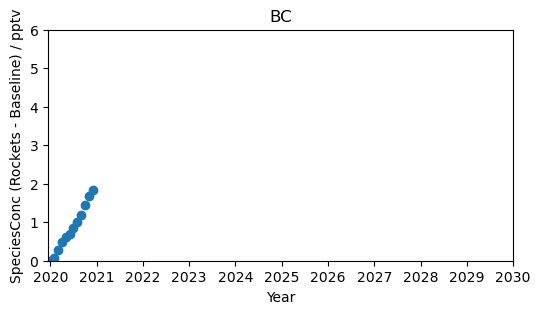

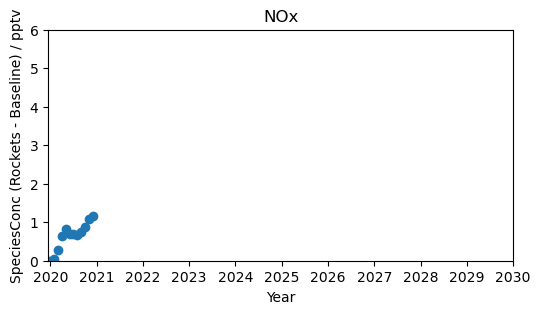

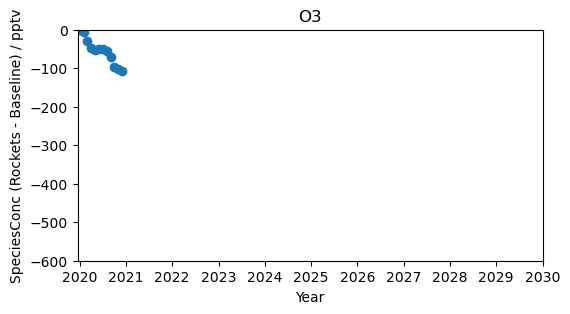

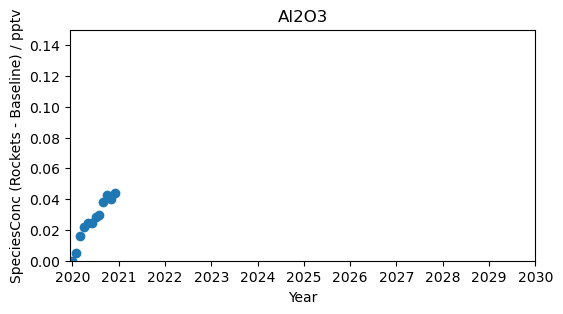

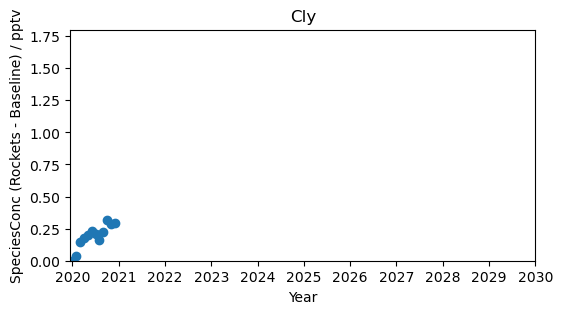

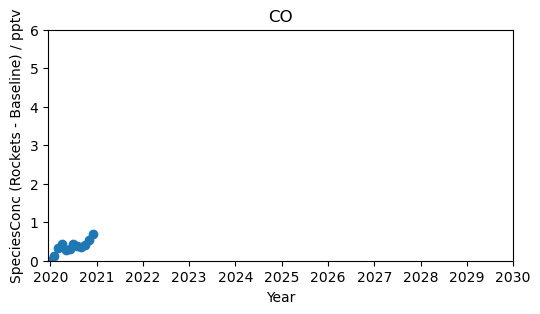

In [3]:
for spec_count in range(len(species)):
    mon_mean_diff = mon_mean_wr[spec_count,:]-mon_mean_nr[spec_count,:]
    fig, ax = plt.subplots(figsize=(6,3))
    ax.scatter(year_labels,np.insert(mon_mean_diff,0,0))
    ax.set_xlabel("Year")
    ax.set_ylabel("SpeciesConc (Rockets - Baseline) / pptv")
    ax.set_xticks(np.linspace(2020,2030,11))
    ax.set_title(species[spec_count])
    if spec_count in [0,1]:
        ax.set_ylim(0,6)
    elif spec_count == 2:
        ax.set_ylim(-600,0)
    elif spec_count == 3:
        ax.set_ylim(0,0.15) 
    elif spec_count == 4: 
        ax.set_ylim(0,1.8)  
    elif spec_count == 5: 
        ax.set_ylim(0,6)          

In [4]:
wr.close()
nr.close()
met.close()

In [5]:

year = "2020"
mth = "11"
wave = "Total" # Total, LW, SW
locs = ["TOA","Trop"]
skipna = True
species = ["DU","BC"]


### Get the radiative forcing data

[[ 0.39733666 -0.24557805]
 [-0.30820265  0.03996678]]


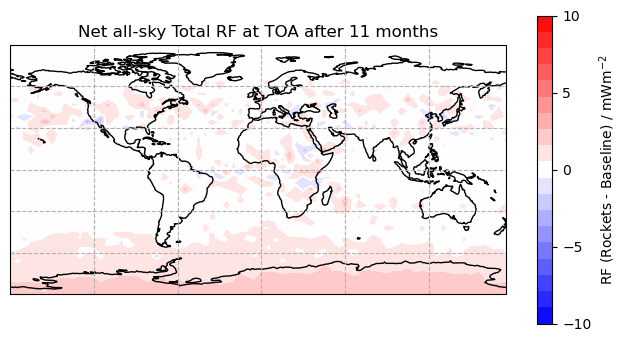

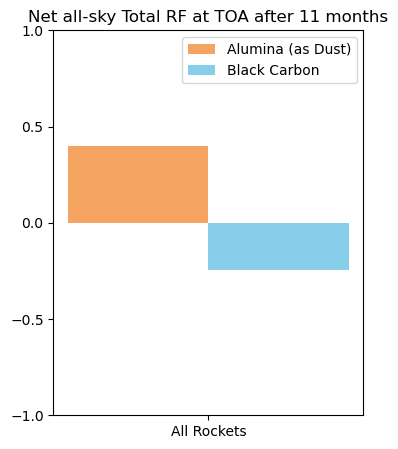

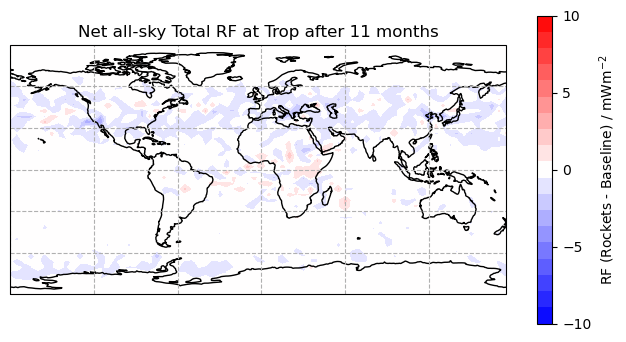

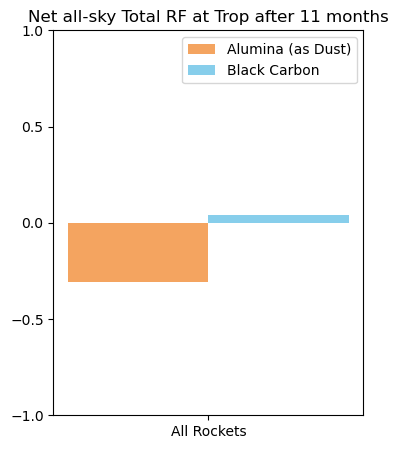

In [6]:
months_passed = int(mth) + int(year)-2020
met = xr.open_dataset(f'/home/ucfacb0/Scratch/StateMet/4x5/{year}/GEOSChem.StateMet.{year}{mth}01_0000z.nc4')
wr  = xr.open_dataset(filepath+rocketsSim+f'/GEOSChem.RRTMG.{year}{mth}01_0000z.nc4') 
nr  = xr.open_dataset(filepath+norocketsSim+f'/GEOSChem.RRTMG.{year}{mth}01_0000z.nc4' )
time, lon, lat = nr.variables['time'][:], nr.variables['lon'][:], nr.variables['lat'][:]

rad_diff = np.zeros((len(locs),len(species)))

for loc_count, loc in enumerate(locs):
    
    if wave == "Total":
        labs,labl = f'RadAllSkySW{loc}_BASE', f'RadAllSkyLW{loc}_BASE'
        radnr = nr[labs].isel(time=0) + nr[labl].isel(time=0)
        radwr = wr[labs].isel(time=0) + wr[labl].isel(time=0)    
    else:
        lab = f'RadAllSky{wave}{loc}_BASE'
        radnr  = nr[lab].isel(time=0)
        radwr  = wr[lab].isel(time=0)       
    
    fig = plt.figure(figsize=[8,4])
    ax = plt.axes(projection=ccrs.PlateCarree())
    ax.coastlines()
    ax.gridlines(linestyle='--')
    diff_mWm2 = 1000*(radwr - radnr)
    #cf = diff_mWm2.plot.contourf(ax=ax, cmap='bwr',levels=np.linspace(-10,10,20))
    #cbar = fig.colorbar(cf, ax=ax, ticks = np.linspace(-10,10,5))
    cmap_extent = 10
    cf = ax.contourf( lon, lat, diff_mWm2, cmap = 'bwr', levels=np.linspace( -cmap_extent, cmap_extent, 20 ))
    cbar = fig.colorbar(cf, ax=ax, ticks = np.linspace(-cmap_extent, cmap_extent,5),label="RF (Rockets - Baseline) / mWm$^{-2}$")
    
    ax.set_title(f"Net all-sky {wave} RF at {loc} after {months_passed} months")
        
    for count,spec in enumerate(species):
        
        if wave == "Total":
            labs,labl = f'RadAllSkySW{loc}_{spec}', f'RadAllSkyLW{loc}_{spec}'
            radnr_spec = (nr[f'RadAllSkySW{loc}_BASE'].isel(time=0) - nr[labs].isel(time=0)) + (nr[f'RadAllSkyLW{loc}_BASE'].isel(time=0) - nr[labl].isel(time=0))
            radwr_spec = (wr[f'RadAllSkySW{loc}_BASE'].isel(time=0) - wr[labs].isel(time=0)) + (wr[f'RadAllSkyLW{loc}_BASE'].isel(time=0) - wr[labl].isel(time=0))
        else:   
            lab = f'RadAllSky{wave}{loc}_{spec}'    
            radnr_spec = radnr - nr[lab].isel(time=0)
            radwr_spec = radwr - wr[lab].isel(time=0)
            
        rad_diff[loc_count,count] = np.nanmean(1000*(radwr_spec - radnr_spec))

    headers = "All Rockets"
    fug = plt.figure(figsize=(4,5))
    ux = fug.add_subplot(111)
    ux.bar(headers, rad_diff[loc_count,0], width=-0.6, color = 'sandybrown', label="Alumina (as Dust)",align='edge')
    ux.bar(headers, rad_diff[loc_count,1], width=0.6, color = 'skyblue',    label="Black Carbon",align='edge')
    ux.set_ylim(-1, 1)
    ux.set_yticks(ticks=np.linspace(-1, 1,5))
    ux.set_title(f"Net all-sky {wave} RF at {loc} after {months_passed} months")
    ux.legend()
    
print(rad_diff)

In [7]:
wr.close()
nr.close()
met.close()